In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.preprocessing import normalize

In [224]:
dataset = pd.read_csv("bike_sharing.csv")
dataset = dataset.drop(columns="dteday", axis=1)
print(dataset.shape)
# dataset.head()  (df == 0).sum(axis=1)
(dataset.cnt == 0).sum(axis=0)
# dataset.info()

(17379, 16)


0

In [225]:
# dataset = normalize(x_data_set, norm='l2', axis=1)

In [226]:
# x_data_set = normalize(x_data_set, norm='l2', axis=1)
x_data_set.shape, y_data_set.shape
# x_data_set[0]
# for cols in dataset.columns.tolist()[1:]:
#     dataset = dataset.ix[dataset[cols] > 0]
# dataset.shape

# for name in list(dataset.columns):
#     if np.min(dataset[name]) > 0 :
#         x.append(dataset[name])
# print(x[0])

((17379, 17), (17379, 1))

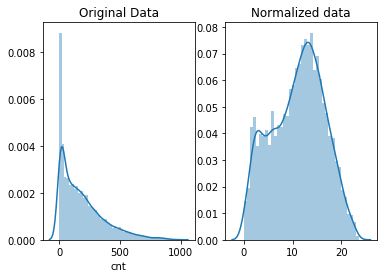

In [227]:
# now transforming feature variable
from scipy import stats
x_normalized_data = stats.boxcox(dataset["cnt"])
fig, ax=plt.subplots(1,2)
sns.distplot(dataset["cnt"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
x_normalized_data = x_normalized_data[0].reshape(len(x_normalized_data[0]), 1)
dataset.cnt = x_normalized_data

In [228]:
x_data_set = np.array(dataset.drop("cnt", axis=1))
y_data_set = np.array(pd.DataFrame(dataset.cnt))

In [229]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data_set, y_data_set, test_size = 0.2, random_state = 0)


# Import linear regression class
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_data, y_train_data)

y_pred_test = regression.predict(x_test_data)
y_pred_train = regression.predict(x_train_data)

In [230]:
import statsmodels.formula.api as sm
x_data_set = np.column_stack((np.ones((dataset.shape[0], 1)), x_data_set))
print(x_data_set.shape)


(17379, 16)


In [231]:
x_opt = x_data_set[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
reg_ols = sm.OLS(endog= y_data_set, exog = x_opt).fit() # Fit ordinary least square to x_opt and y
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     8468.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:45:09   Log-Likelihood:                -35453.
No. Observations:               17379   AIC:                         7.094e+04
Df Residuals:                   17363   BIC:                         7.106e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2566      0.099     43.157      0.000       4.063       4.450
x1            -0.0001   6.73e-05     -2.139      0.032      -0.000   -1.21e-05
x2             0.1390      0.024      5.802      0.000       0.092       0.186
x3             1.2361      0.589      2.097      0.036       0.081       2.392
x4             0.1026      0.050      2.068      0.039       0.005       0.200
x5             0.1529      0.002     66.574      0.000       0.148       0.157
x6            -0.1988      0.088     -2.260      0.024      -0.371      -0.026
x7             0.0222      0.007      3.121      0.002       0.008       0.036
x8            -0.2210      0.036     -6.145      0.000      -0.291      -0.150
x9             0.0555      0.025      2.215      0.027       0.006       0.105
x10           -0.6138      0.486     -1.263      0.207      -1.566       0.339
x11            2.5630      0.546      4.694      0.000       1.493       3.633
x12           -1.2914      0.095    -13.659      0.000      -1.477      -1.106
x13            0.3400      0.126      2.689      0.007       0.092       0.588
x14            0.0216      0.000     51.039      0.000       0.021       0.022
x15            0.0240      0.000    192.518      0.000       0.024       0.024
==============================================================================
Omnibus:                     1351.291   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1685.950
Skew:                          -0.755   Prob(JB):                         0.00
Kurtosis:                       3.223   Cond. No.                     5.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
x_opt = x_data_set[:, [0,1,2,3,4,5,6,7,8,9,10,11,13,14,15]]
reg_ols = sm.OLS(endog= y_data_set, exog = x_opt).fit() # Fit ordinary least square to x_opt and y
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     8964.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:45:09   Log-Likelihood:                -35546.
No. Observations:               17379   AIC:                         7.112e+04
Df Residuals:                   17364   BIC:                         7.124e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5485      0.084     42.066      0.000       3.383       3.714
x1            -0.0002   6.77e-05     -2.522      0.012      -0.000    -3.8e-05
x2             0.1248      0.024      5.186      0.000       0.078       0.172
x3             1.4833      0.592      2.504      0.012       0.322       2.644
x4             0.1160      0.050      2.328      0.020       0.018       0.214
x5             0.1584      0.002     69.602      0.000       0.154       0.163
x6            -0.1713      0.088     -1.937      0.053      -0.345       0.002
x7             0.0250      0.007      3.508      0.000       0.011       0.039
x8            -0.1716      0.036     -4.770      0.000      -0.242      -0.101
x9            -0.0957      0.023     -4.238      0.000      -0.140      -0.051
x10           -0.3030      0.488     -0.621      0.535      -1.260       0.654
x11            2.0638      0.548      3.768      0.000       0.990       3.137
x12            0.7786      0.123      6.332      0.000       0.538       1.020
x13            0.0230      0.000     55.819      0.000       0.022       0.024
x14            0.0241      0.000    192.300      0.000       0.024       0.024
==============================================================================
Omnibus:                     1362.470   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1706.038
Skew:                          -0.763   Prob(JB):                         0.00
Kurtosis:                       3.160   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
X_Optimal_Train, X_Optimal_Test = train_test_split(x_opt,test_size = 0.2, random_state = 0)
regression.fit(X_Optimal_Train, y_train_data)

# Predicting the Optimal Test set results

Y_Optimal_Pred = regression.predict(X_Optimal_Test)

In [234]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

def accuracy( y_data_test, y_pred_test):
    total_error = 0
    for i in range(0, len(y_data_test)):
        total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
    total_error = (total_error / len(y_data_test))
    accuracy = 1 - total_error
    return accuracy * 100
print((mean_absolute_error(y_test_data,Y_Optimal_Pred)))

print("Test EVS: ", explained_variance_score(y_test_data, y_pred_test)) 
#       "Train EVS: ", explained_variance_score(y_train_data, y_pred_train))

print("accuracy test: ", accuracy(np.array(y_test_data), Y_Optimal_Pred))
# print("accuracy train: ", accuracy(np.array(y_train_data), Y_Optimal_Pred))

r_score_test = r2_score(y_test_data,Y_Optimal_Pred) 
# r_score_train = r2_score(y_train_data, y_pred_train) 

print("r_score_test : ",r_score_test)
# print("r_score_train : ",r_score_train)
dataset.describe()


1.5061088553962592
Test EVS:  0.8783758952450554
accuracy test:  [-inf]
r_score_test :  0.8770189506506594


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,11.031062
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,5.366500
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,6.827897
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,11.601122
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,15.048979
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,23.535713


In [235]:
len(Y_Optimal_Pred)

3476

In [236]:
for i in range(len(Y_Optimal_Pred)):
    x =  (Y_Optimal_Pred[i] == 0).sum(axis=0)
x

0